## Homework 3

##### Task: Implement linear regression (in progress)
##### Data: Housing data from Kings County, Washington from Kaggle

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

#### Mean Squared Error Function (Loss Function)

In [2]:
# Mean Squared Error

# y' = mx + b
# weight = m (the predicted slope)
# bias = b (the predicted y-intercept)

def mse(dataframe: pd, x_column: str, y_column: str, weight: int, bias: int):
    data_length = len(dataframe[x_column])
    sum_error = 0
    for i in range(data_length):
        x_value = dataframe.at[i, x_column]
        y_value = dataframe.at[i, y_column]
        sum_error += ((bias + (weight * x_value) - y_value) ** 2)
    
    cost = (1 / data_length) * sum_error
    
    return cost

#### Testing our MSE function with dummy data

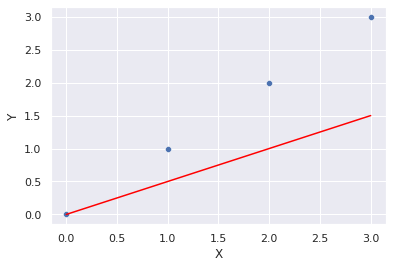

In [3]:
# Illustrating testing data
data1 = {
    "X": [0,1,2,3],
    "Y": [0,1,2,3]
}
data2 = {
    "X": [0, 3],
    "Y": [0, 1.5]
}
test_df = pd.DataFrame(data1)
line_df = pd.DataFrame(data2)

ax = sns.scatterplot(data=test_df, x = "X", y ="Y")
sns.lineplot(data=line_df, x = "X", y ="Y", color = "red", ax = ax)
plt.show()

In [4]:
# Testing if mse function works
data = {
    "X": [0,1,2,3],
    "Y": [0,1,2,3]
}
test_df = pd.DataFrame(data)

# Predicted Line
pred_bias = 0.5    # slope
pred_weight = 0    # weight

mse_test = mse(test_df, "X", "Y", pred_bias, pred_weight)
print("Mean Squared Error:", mse_test)

Mean Squared Error: 0.875


#### Exploring the housing data 

In [5]:
# Importing csv file to dataframe
housing_df = pd.read_csv("housing.csv")

In [6]:
housing_df.shape

(21613, 21)

In [7]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
housing_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# To speed up calculations
housing_df = housing_df.drop(columns = ["date", "id", "zipcode", "lat", "long", "grade", "condition", "view", "yr_built", "yr_renovated"])

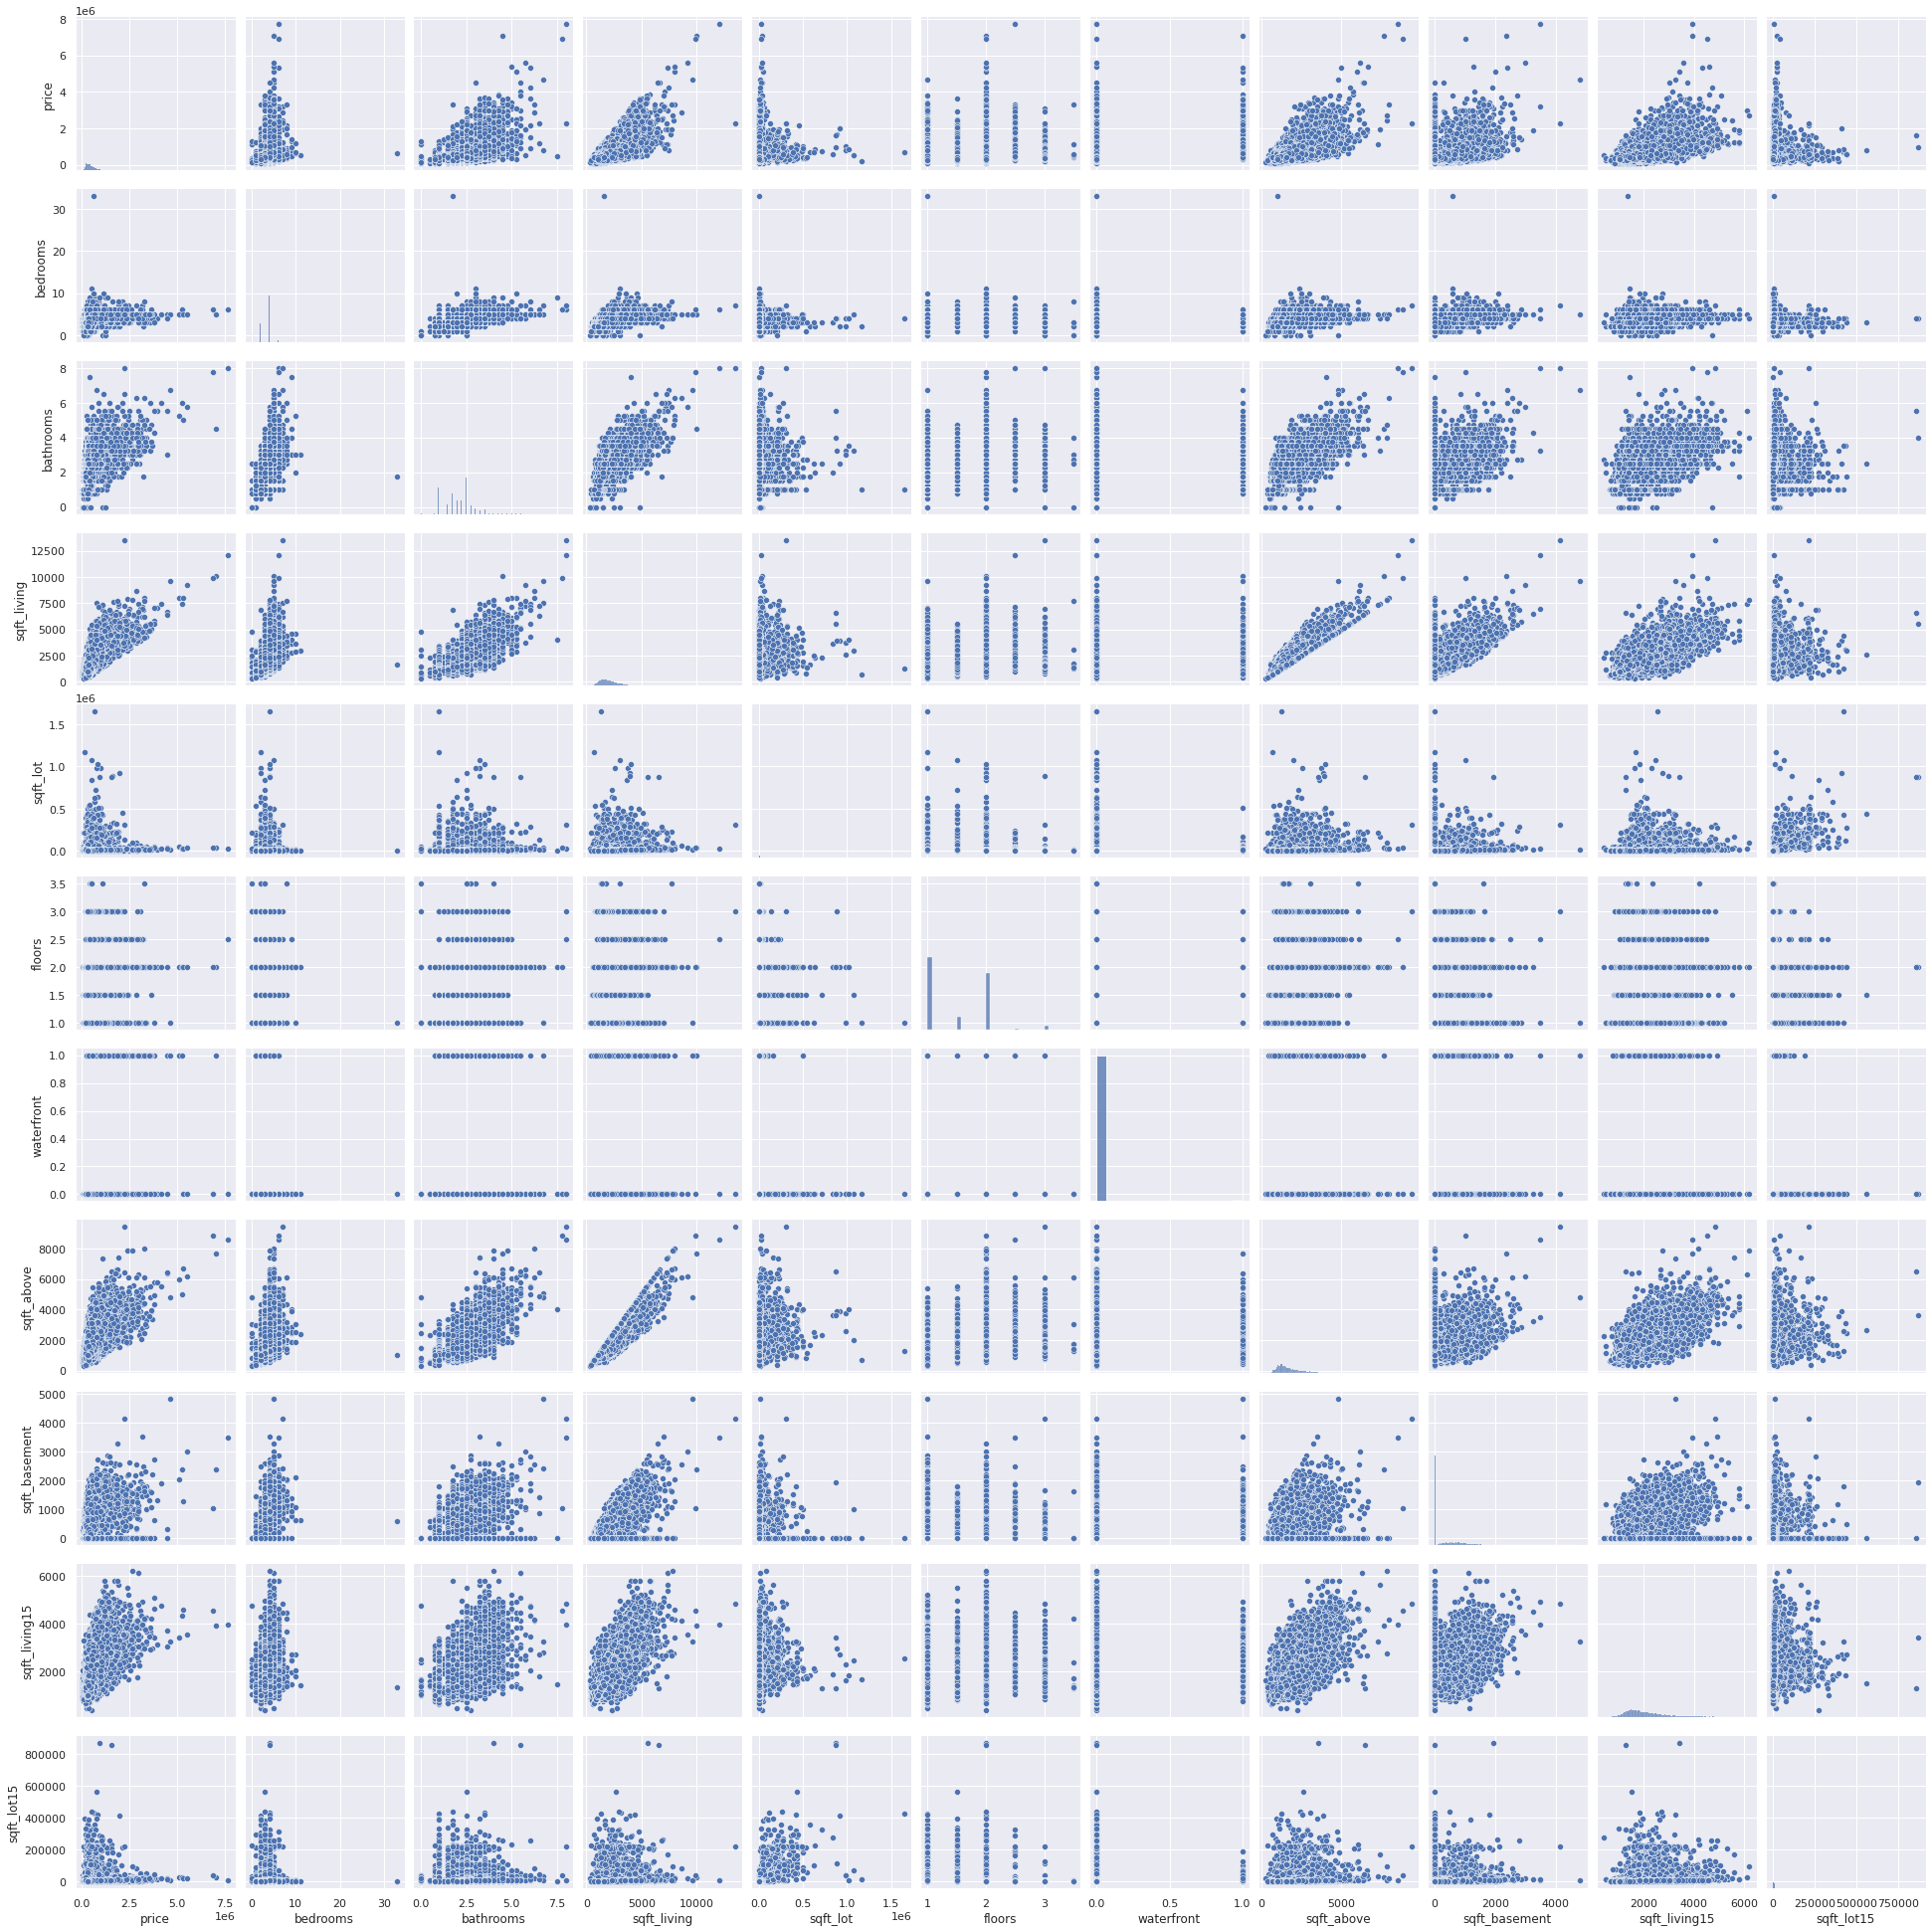

In [10]:
# Creating a pairplot of the data to visualize relationships between two variables throughtout the data
sns.pairplot(housing_df)

#### The relationship between "sqft_living" and "price" appears to be somewhat linear based on the pairplot above. This is what we will use.

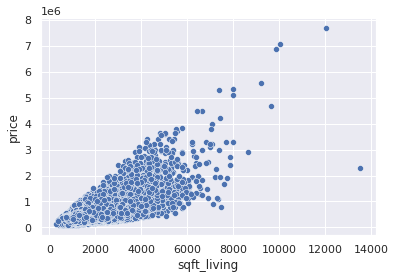

In [11]:
ax = sns.scatterplot(data=housing_df, x = "sqft_living", y = "price");
plt.show()

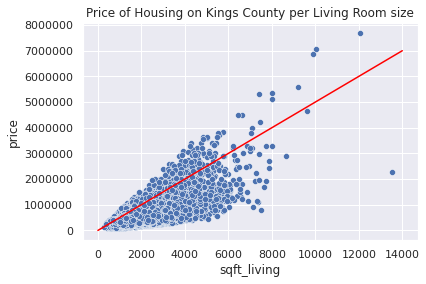

In [12]:
# Graphing dataset for illustration purposes
ax = sns.scatterplot(
    data=housing_df, 
    x = "sqft_living", 
    y = "price"
)

data = {
    "X": [0, 14000],
    "Y": [0, 7000000]
}
line_df = pd.DataFrame(data)
sns.lineplot(data=data, x = "X", y = "Y", ax = ax, color='red')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Price of Housing on Kings County per Living Room size")
plt.show()

#### Testing MSE function with hosing data

In [13]:
# Predicted Line
slope = 500
intercept = 0

housing_mse = mse(housing_df, "sqft_living", "price", slope, intercept)
print("Mean Squared Error:", housing_mse)

Mean Squared Error: 358807071955.49304
